## `Import Functions`

In [97]:
import pandas as pd
import numpy as np
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [37]:
tweeter = pd.read_json('C:/Users/Aakash Sharma/Desktop/Unstructured data/NLP/Narendra Modi Tweets.json')
tweeter.head()

,Text,Lang,Source,Time,Retweets
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388
1,दिल्ली में 1700 से ज्यादा कॉलोनियों में रहने व...,hi,Twitter Media Studio,1580221574000,3813
2,दशकों पुरानी समस्याओं को सुलझा रही हमारी सरकार...,hi,Twitter Media Studio,1580221411000,3693
3,"स्वतंत्र भारत ने पाकिस्तान, बांग्लादेश और अफगा...",hi,Twitter Media Studio,1580221113000,6170
4,सालों तक नॉर्थ ईस्ट के साथ जिस तरह की नीति अपन...,hi,Twitter Media Studio,1580220984000,3060


In [38]:
(tweeter.Lang=='en').sum()

729

In [39]:
tweeter_en = tweeter[tweeter['Lang']=='en']
tweeter_en.head()

,Text,Lang,Source,Time,Retweets
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388
6,Delighted to be at the NCC Rally. Watch. https...,en,Periscope,1580196983000,4533
7,Addressing the Global Potato Conclave. https:/...,en,Periscope,1580189524000,3508
9,Excellent idea @AmanKayamHai_ET! \n\nYou may c...,en,Twitter Web App,1580125842000,3341
10,Extremely touched by the lovely #RepublicDay w...,en,Twitter Web App,1580125780000,2591


## `clean the tweets`


In [40]:
# clean the tweets

tweet_tok = TweetTokenizer()
lemm = WordNetLemmatizer()

def clean_txt(sent):
    tokens = regexp_tokenize(sent.lower(),'#[\w]+')
    stop_updated = stopwords.words("english") + list(punctuation)
    final_word = [lemm.lemmatize(term) for term in tokens if term not in stop_updated 
               and len(term) > 2] 
    res = " ".join(final_word)
    return res

In [41]:
tweeter_en['clean_tweet'] = tweeter.Text.apply(clean_txt)

C:\Users\Aakash Sharma\Anaconda3\envs\tft\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
tweeter_en.head()

,Text,Lang,Source,Time,Retweets,clean_tweet
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388,
6,Delighted to be at the NCC Rally. Watch. https...,en,Periscope,1580196983000,4533,
7,Addressing the Global Potato Conclave. https:/...,en,Periscope,1580189524000,3508,
9,Excellent idea @AmanKayamHai_ET! \n\nYou may c...,en,Twitter Web App,1580125842000,3341,
10,Extremely touched by the lovely #RepublicDay w...,en,Twitter Web App,1580125780000,2591,#republicday


## `Create DTM`

In [43]:
# Create DTM

count_vect = CountVectorizer()
X = count_vect.fit_transform(tweeter_en['clean_tweet'])
tweet_DTM = pd.DataFrame(X.toarray(), columns = count_vect.get_feature_names())
tweet_DTM

,100yearsofassocham,asean2019,bharatkilaxmi,cab,cab2019,changewithin,chennaiconnect,constitutionday,diwali,gandhi150,...,mannkibaat,nitilecture,parikshapecharcha2020,plogforcleanplanet,plogforswachhbharat,republicday,republicsummit,singaporeindiahackathon,solareclipse2019,thukmat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
a = tweet_DTM.sum().sort_values(ascending = False).head(25)

In [35]:
a.head()

mannkibaat     24
republicday     8
diwali          6
htls2019        4
gandhi150       4
dtype: int64

## `Using Kmeans algorithm, cluster the tweets in to groups`

In [55]:
# Using Kmeans algorithm, cluster the tweets in to groups
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 0)
y_kmeans = kmeans.fit_predict(tweet_DTM)

## `Top 5 hashtag in each group`

In [56]:
# Top 5 hashtag in each group

def k_cluster(c):
    BOW = count_vect.get_feature_names()
    num_cluster = len(c)
    n = int(input()) 
    argsort_cluster = np.argsort(c)[:,::-1]
    print('Top',n,'words per cluster:')
    for i in range(num_cluster):
        print('')
        print('Cluster :',i)
        for j in argsort_cluster[i,:n]:
            print(BOW[j])

k_cluster(kmeans.cluster_centers_)

5
Top 5 erms per cluster:

Cluster : 0
diwali
mannkibaat
thukmat
hagibis
asean2019

Cluster : 1
gandhi150
htls2019
constitutionday
singaporeindiahackathon
gandhijayanti

Cluster : 2
republicday
thukmat
solareclipse2019
asean2019
bharatkilaxmi

Cluster : 3
mannkibaat
republicday
htls2019
gandhi150
diwali


## `Plot wordcloud of each group`

In [57]:
tweeter_en['predicted_cluster'] = y_kmeans

C:\Users\Aakash Sharma\Anaconda3\envs\tft\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
tweeter_en.head()

,Text,Lang,Source,Time,Retweets,clean_tweet,predicted_cluster
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388,,1
6,Delighted to be at the NCC Rally. Watch. https...,en,Periscope,1580196983000,4533,,1
7,Addressing the Global Potato Conclave. https:/...,en,Periscope,1580189524000,3508,,1
9,Excellent idea @AmanKayamHai_ET! \n\nYou may c...,en,Twitter Web App,1580125842000,3341,,1
10,Extremely touched by the lovely #RepublicDay w...,en,Twitter Web App,1580125780000,2591,#republicday,2


In [82]:
a = set(y_kmeans)
a

{0, 1, 2, 3}

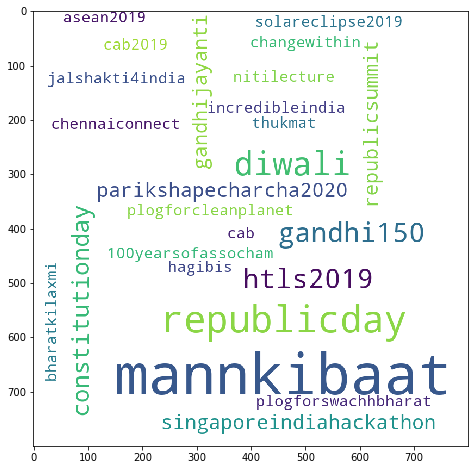

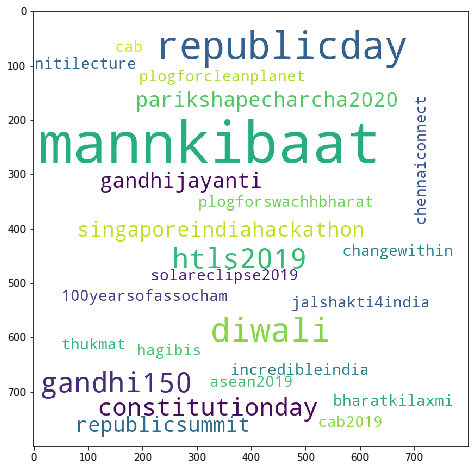

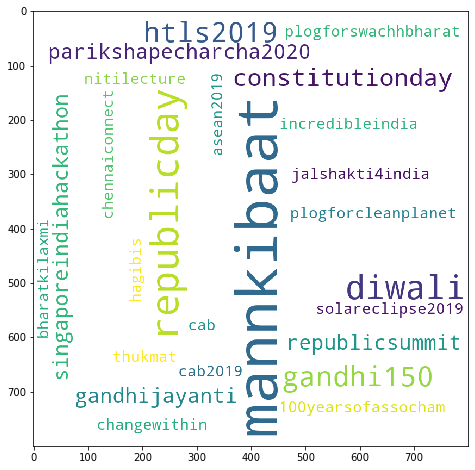

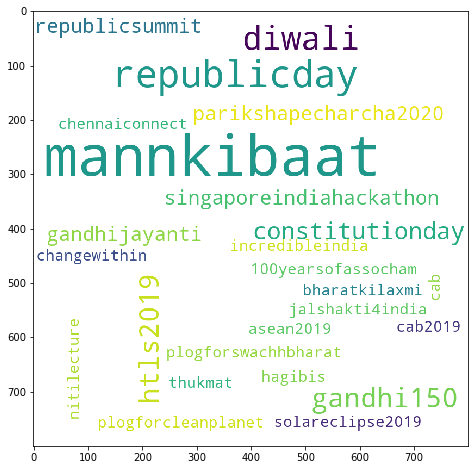

In [96]:
for i in a:
    tweeter_en[tweeter_en['predicted_cluster']==i]
    text = ' '.join(tweeter_en.clean_tweet.values)
    word_cloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 150).generate(text)
    plt.figure(figsize = [8,8])
    plt.imshow(word_cloud)
    plt.show()
                  